In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
shooting_df = pd.read_csv('data/fatal-police-shootings-data.csv')
shooting_df = shooting_df.rename(columns = {'city': 'City'})
shooting_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,City,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
census_df = pd.read_csv('data/full_census_data.csv')
census_df = census_df.drop(columns= {"Unnamed: 0", "Unnamed: 0.1"})
census_df = census_df.rename(columns = {"Geographic Area" : "state"})
census_df.head()

,state,City,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,11207,21.2,78.8,67.2,30.2,0,0,1.6
1,AL,Abbeville,25615,69.1,29.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville,42575,78.9,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison,37083,81.4,30.7,99.1,0.1,0,0.1,0.4
4,AL,Akron,21667,68.6,42,13.2,86.5,0,0,0.3


In [4]:
merged = shooting_df.merge(census_df, how = 'left', on=['City', 'state'])
data = merged
data

,id,name,date,manner_of_death,armed,age,gender,race,City,state,...,latitude,is_geocoding_exact,Median Income,percent_completed_hs,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,47.247,True,37072,80.1,28.6,78.9,0.8,3.7,1.1,19.2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,45.487,True,65765,88.1,14.9,70.9,2.6,1,8.9,21.1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,37.695,True,45947,87.5,17.3,71.9,11.5,1.2,4.8,15.3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,37.763,True,81294,87,13.2,48.5,6.1,0.5,33.3,15.1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,40.384,True,47791,76.3,16.6,76.5,0.9,1.2,0.9,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,6651,NaN,2021-02-26,shot and Tasered,gun,NaN,M,NaN,San Antonio,TX,...,29.429,True,46744,81.4,19.8,72.6,6.9,0.9,2.4,63.2
6092,6644,NaN,2021-02-27,shot,undetermined,NaN,M,NaN,Dora,AL,...,33.729,True,40769,82.3,17.2,85.6,12.2,0.3,0,0.7
6093,6645,NaN,2021-02-27,shot,gun,NaN,M,NaN,Sebeka,MN,...,46.616,True,35893,92.6,18,97.9,0.4,0.1,0,0.8
6094,6646,NaN,2021-02-27,shot,undetermined,NaN,M,NaN,Sebeka,MN,...,46.616,True,35893,92.6,18,97.9,0.4,0.1,0,0.8


In [5]:
race_grouping = data.loc[:, ["id", "race"]]
race_grouping = race_grouping.groupby(["race"])["id"].count()
race_grouping = pd.DataFrame(race_grouping)
race_grouping.head(10)

,id
race,
A,100
B,1449
H,1025
N,83
O,47
W,2790


In [6]:
x_labels= ["A", "B", "H", "N", "O", "W"]
y_labels= [100, 1449, 1025, 83, 47, 2790]

<BarContainer object of 6 artists>

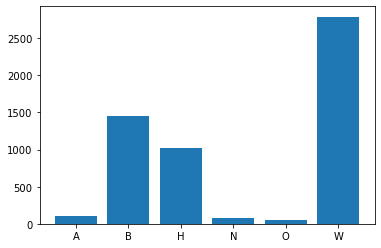

In [7]:
plt.bar(x_labels, y_labels)

In [8]:
attack_grouping = data.loc[:, ["id", "threat_level"]]
attack_grouping = attack_grouping.groupby(["threat_level"])["id"].count()
attack_grouping = pd.DataFrame(attack_grouping)
attack_grouping = attack_grouping.sort_values("id", ascending=False)
attack_grouping.head()

,id
threat_level,
attack,3948
other,1892
undetermined,256


In [9]:
flee_grouping = data.loc[:, ["id", "flee"]]
flee_grouping = flee_grouping.groupby(["flee"])["id"].count()
flee_grouping = pd.DataFrame(flee_grouping)
flee_grouping = flee_grouping.sort_values("id", ascending=False)
flee_grouping.head()

,id
flee,
Not fleeing,3747
Car,1001
Foot,795
Other,205


In [10]:
reduced_df = data.loc[:, ["id", "race", "armed", "threat_level", "signs_of_mental_illness", "flee"]]
reduced_df.head()

,id,race,armed,threat_level,signs_of_mental_illness,flee
0,3,A,gun,attack,True,Not fleeing
1,4,W,gun,attack,False,Not fleeing
2,5,H,unarmed,other,False,Not fleeing
3,8,W,toy weapon,attack,True,Not fleeing
4,9,H,nail gun,attack,False,Not fleeing


In [11]:
unarmed = reduced_df.loc[reduced_df["armed"] == "unarmed"]
unarmed

,id,race,armed,threat_level,signs_of_mental_illness,flee
2,5,H,unarmed,other,False,Not fleeing
8,16,W,unarmed,other,False,Not fleeing
17,36,B,unarmed,attack,False,Not fleeing
62,352,H,unarmed,other,False,Car
72,342,W,unarmed,other,False,Foot
...,...,...,...,...,...,...
5966,6485,B,unarmed,other,True,Not fleeing
5994,6539,NaN,unarmed,attack,False,Car
6017,6562,W,unarmed,undetermined,False,Not fleeing
6030,6607,B,unarmed,attack,False,Not fleeing


In [12]:
unarmed_attack = unarmed.loc[unarmed["threat_level"] == "attack"]
unarmed_attack

,id,race,armed,threat_level,signs_of_mental_illness,flee
17,36,B,unarmed,attack,False,Not fleeing
83,116,B,unarmed,attack,False,Not fleeing
152,187,W,unarmed,attack,False,Not fleeing
155,194,B,unarmed,attack,True,Not fleeing
165,203,B,unarmed,attack,False,Foot
...,...,...,...,...,...,...
5882,6410,W,unarmed,attack,True,Car
5884,6444,H,unarmed,attack,False,Not fleeing
5957,6484,W,unarmed,attack,False,Not fleeing
5994,6539,NaN,unarmed,attack,False,Car


In [13]:
unarmed_attack_flee = unarmed_attack.loc[unarmed_attack["flee"] != "Not fleeing"]
unarmed_attack_flee.groupby(["race"])["id"].count()

race
B    29
H     3
O     1
W    22
Name: id, dtype: int64

In [14]:
reduced_df.loc[reduced_df.threat_level != 'attack', 'threat_level'] = "0"
reduced_df.loc[reduced_df.threat_level == 'attack', 'threat_level'] = "1"

In [15]:
reduced_df = reduced_df.drop(columns = "id")

In [16]:
reduced_df = reduced_df.dropna()
reduced_df

,race,armed,threat_level,signs_of_mental_illness,flee
0,A,gun,1,True,Not fleeing
1,W,gun,1,False,Not fleeing
2,H,unarmed,0,False,Not fleeing
3,W,toy weapon,1,True,Not fleeing
4,H,nail gun,1,False,Not fleeing
...,...,...,...,...,...
6071,W,gun,1,False,Car
6072,W,gun,1,False,Car
6073,B,undetermined,0,False,Foot
6078,W,gun,1,False,Foot


In [17]:
X = reduced_df.drop("threat_level", axis=1)
y = reduced_df["threat_level"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5010, 4) (5010, 1)


In [18]:
X.loc[X.armed != 'unarmed', 'armed'] = "armed"

In [19]:
X.loc[X.flee == "Other", "flee"] = "Not fleeing"
X.loc[X.flee != "Not fleeing", "flee"] = "flee"

In [20]:
X["signs_of_mental_illness"] = X["signs_of_mental_illness"].astype(str)
X = pd.get_dummies(X)

In [21]:
X

,race_A,race_B,race_H,race_N,race_O,race_W,armed_armed,armed_unarmed,signs_of_mental_illness_False,signs_of_mental_illness_True,flee_Not fleeing,flee_flee
0,1,0,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,1,1,0,1,0,1,0
2,0,0,1,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,1,1,0,0,1,1,0
4,0,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6071,0,0,0,0,0,1,1,0,1,0,0,1
6072,0,0,0,0,0,1,1,0,1,0,0,1
6073,0,1,0,0,0,0,1,0,1,0,0,1
6078,0,0,0,0,0,1,1,0,1,0,0,1


In [22]:
X.drop(["race_O", "armed_armed", "signs_of_mental_illness_False", "flee_flee"], axis=1, inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [27]:
 classifier.fit(X_train_scaled, y_train)

/Users/lucykaplan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [28]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6792653713068938
Testing Data Score: 0.6640063846767758


In [29]:
reduced_df2 = data.loc[:, ["id", "race", "armed", "threat_level", "signs_of_mental_illness", "flee", "body_camera"]]
reduced_df2.head()

,id,race,armed,threat_level,signs_of_mental_illness,flee,body_camera
0,3,A,gun,attack,True,Not fleeing,False
1,4,W,gun,attack,False,Not fleeing,False
2,5,H,unarmed,other,False,Not fleeing,False
3,8,W,toy weapon,attack,True,Not fleeing,False
4,9,H,nail gun,attack,False,Not fleeing,False


In [30]:
bodycam = reduced_df2.loc[reduced_df2["body_camera"] == True]
bodycam

,id,race,armed,threat_level,signs_of_mental_illness,flee,body_camera
8,16,W,unarmed,other,False,Not fleeing,True
14,27,B,gun,attack,False,Foot,True
16,32,W,shovel,attack,False,Not fleeing,True
18,37,W,gun,attack,False,Not fleeing,True
24,46,W,gun,attack,False,Foot,True
...,...,...,...,...,...,...,...
6071,6626,W,gun,attack,False,Car,True
6072,6635,W,gun,attack,False,Car,True
6076,6628,NaN,gun,attack,False,Other,True
6082,6631,NaN,gun,attack,False,Foot,True


In [31]:
bodycam.loc[bodycam.threat_level != 'attack', 'threat_level'] = "0"
bodycam.loc[bodycam.threat_level == 'attack', 'threat_level'] = "1"

/Users/lucykaplan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
bodycam = bodycam.drop(columns = ["id", "body_camera"])
bodycam = bodycam.dropna()
bodycam

,race,armed,threat_level,signs_of_mental_illness,flee
8,W,unarmed,0,False,Not fleeing
14,B,gun,1,False,Foot
16,W,shovel,1,False,Not fleeing
18,W,gun,1,False,Not fleeing
24,W,gun,1,False,Foot
...,...,...,...,...,...
6008,H,gun,0,False,Foot
6015,W,gun,1,True,Not fleeing
6033,B,gun,1,False,Not fleeing
6071,W,gun,1,False,Car


In [33]:
X = bodycam.drop("threat_level", axis=1)
y = bodycam["threat_level"].values.reshape(-1, 1)
print(X.shape, y.shape)

(670, 4) (670, 1)


In [34]:
X.loc[X.armed != 'unarmed', 'armed'] = "armed"
X.loc[X.flee == "Other", "flee"] = "Not fleeing"
X.loc[X.flee != "Not fleeing", "flee"] = "flee"
X["signs_of_mental_illness"] = X["signs_of_mental_illness"].astype(str)
X = pd.get_dummies(X)

In [35]:
X

,race_A,race_B,race_H,race_N,race_O,race_W,armed_armed,armed_unarmed,signs_of_mental_illness_False,signs_of_mental_illness_True,flee_Not fleeing,flee_flee
8,0,0,0,0,0,1,0,1,1,0,1,0
14,0,1,0,0,0,0,1,0,1,0,0,1
16,0,0,0,0,0,1,1,0,1,0,1,0
18,0,0,0,0,0,1,1,0,1,0,1,0
24,0,0,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6008,0,0,1,0,0,0,1,0,1,0,0,1
6015,0,0,0,0,0,1,1,0,0,1,1,0
6033,0,1,0,0,0,0,1,0,1,0,1,0
6071,0,0,0,0,0,1,1,0,1,0,0,1


In [36]:
X.drop(["race_O", "armed_armed", "signs_of_mental_illness_False", "flee_flee"], axis=1, inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [39]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [41]:
classifier.fit(X_train_scaled, y_train)

/Users/lucykaplan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [42]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6334661354581673
Testing Data Score: 0.5773809523809523


In [43]:
reduced_df3 = data.loc[:, ["race", "threat_level"]]

In [44]:
reduced_df3 = reduced_df3.dropna()

In [45]:
reduced_df3.loc[reduced_df3.threat_level != 'attack', 'threat_level'] = "0"
reduced_df3.loc[reduced_df3.threat_level == 'attack', 'threat_level'] = "1"

In [46]:
reduced_df3

,race,threat_level
0,A,1
1,W,1
2,H,0
3,W,1
4,H,1
...,...,...
6078,W,1
6079,W,1
6085,H,1
6086,W,1


In [47]:
X = reduced_df3.drop("threat_level", axis=1)
y = reduced_df3["threat_level"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5494, 1) (5494, 1)


In [48]:
X = pd.get_dummies(X)
X

,race_A,race_B,race_H,race_N,race_O,race_W
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6078,0,0,0,0,0,1
6079,0,0,0,0,0,1
6085,0,0,1,0,0,0
6086,0,0,0,0,0,1


In [49]:
X.drop(["race_W"], axis=1, inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [52]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [54]:
classifier.fit(X_train_scaled, y_train)

/Users/lucykaplan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [55]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6468446601941747
Testing Data Score: 0.6455604075691412
